# Preprocess calls

### Imports

In [1]:
import pandas as pd

from py_files.string_cleaning import clean_chords
from py_files.genre_cleaning import genre_cleaning
from py_files.columns import new_columns, song_length, drop_dups_cols, expand_cols
from py_files.get_data_slice import filter_length, get_songs
from py_files.utils import df_to_csv, count_chords, count_genres, count_artists, \
                  get_csv_data, get_text_data

## Read Data

In [3]:
raw_kaggle_df = get_csv_data('kaggle_raw.csv')
len(raw_kaggle_df)

135783

In [4]:
raw_kaggle_df.head(3)

,Unnamed: 0,artist_name,song_name,chords&lyrics,chords,lyrics,tabs,lang,artist_id,followers,genres,popularity,name_e_chords
0,0,Justin Bieber,"10,000 Hours",\nCapo on 3rd fret\n\t \t\t \r\n\r\nVerse 1:\...,{3: 'G G/B ...,"{0: '\nCapo on 3rd fret\n\t \t\t ', 1: '', 2:...","{89: ""I-----, I'm gonna love you ""}",en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber
1,1,Justin Bieber,2 Much,\n\t \t\t\r\nIntro: F#m7 D2 \r\n\r\nVerse 1:...,"{1: 'Intro: F#m7 D2 ', 4: 'F#m7 ', 8: 'D2 ', ...","{0: '\n\t \t\t', 2: '', 3: 'Verse 1:', 5: ' ...",{},en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber
2,2,Justin Bieber,2u (feat. David Guetta),\n\t \t\t\r\nEm D C ...,{1: 'Em D C C...,"{0: '\n\t \t\t', 2: ""No limit in the sky that...",{},en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber


In [5]:
raw_jazz_col = get_text_data('jazz_raw.txt')
raw_jazz_df = expand_cols(raw_jazz_col)
raw_jazz_df

,genres,artist_name,chords,song_name
1,jazz,unknown,C:maj C:maj C:maj C:maj C:maj C:maj C:maj C:m...,unknown
3,jazz,unknown,D#:maj D#:maj D#:maj D#:maj D#:maj D#:maj A#:...,unknown
5,jazz,unknown,C:maj7 C:maj7 D:min7 D:min7 E:min7 E:min7 D:m...,unknown
7,jazz,unknown,C:maj7/5 C:maj7/5 A:min7 A:min7 D:min7 D:min7...,unknown
9,jazz,unknown,C:maj C:maj C:aug C:aug C:maj6 C:maj6 C:maj6 ...,unknown
...,...,...,...,...
5683,jazz,unknown,C:min C:min C:min C:min C:min C:min F:7 F:7 C...,unknown
5685,jazz,unknown,"G#:7(s5,*5) G#:7(s5,*5) G#:7(s5,*5) G#:7(s5,*...",unknown
5687,jazz,unknown,C:maj C:maj C:maj C:maj C:maj C:maj C:maj C:m...,unknown
5689,jazz,unknown,C:maj C:maj C:maj C:maj F:min F:min F:min F:m...,unknown


## Drop Duplicates and unwanted columns (only if song/artist data exists)

In [6]:
slim_df = drop_dups_cols(raw_kaggle_df)
len(slim_df)

135775

## Concat DFs

In [7]:
concat_df = pd.concat([slim_df, raw_jazz_df], ignore_index=True)
len(concat_df)

138621

## Clean Chords

In [8]:
cleaned_df = concat_df.copy()
cleaned_chords_column = clean_chords(concat_df['chords'])
cleaned_df['chords'] = cleaned_chords_column
len(cleaned_df)

138621

In [9]:
cleaned_df

,artist_name,genres,chords,song_name
0,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']","[G, C, G, C, G, Em, C, G, Em, C, G, Em, C, G, ...","10,000 Hours"
1,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']","[D, E, A, E, D, E, Bm, A, D, E, A, D, E, D, A,...",2 Much
2,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']","[D, C, D, Em, D, C, D, Em, D, C, Am, D, Em, G,...",2u (feat. David Guetta)
3,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']","[Em, Bm, Am, C, Em, Bm, Am, C, Em, Bm, Am, C, ...",All Around The World
4,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']","[Gm, Dm, C, Gm, Dm, C, Gm, Dm, C, Gm, Cdim, Gm...",All Around The World (acoustic)
...,...,...,...,...
138616,unknown,jazz,"[Cm, F7, Cm, F7, G7, D7, G7, D7, Cm, F7, Cm, F...",unknown
138617,unknown,jazz,"[G, G, G, Gm7, C7, Fm7, A7, Dm, Dm, Dm, G, G, ...",unknown
138618,unknown,jazz,"[C, F7, C, G7, G7, G7, G7, G7, G7, G7, G7, C, ...",unknown
138619,unknown,jazz,"[C, Fm, C, Fm, Em7, Dm7, D7, G7, C, Em, B7, Em...",unknown


### drop duplicates based on chords and song name

In [10]:
new_columns_df = new_columns(cleaned_df)

unreplicated_df = \
    new_columns_df.drop_duplicates(subset=['chords_list', 'song_name'],
                                   keep = 'last').reset_index(drop = True)
    
# drop unnecessary columns
unreplicated_df.drop(columns=['song_name', 'chords_list'], inplace=True)

## Clean Genres

In [11]:
slim_genres = genre_cleaning(unreplicated_df['genres'])
clean_genres_df = unreplicated_df.copy()
clean_genres_df['genres'] = slim_genres

## Get Song Length (chord count)

In [12]:
song_len_df = song_length(clean_genres_df)
song_len_df

,artist_name,genres,chords,song_length
0,Justin Bieber,pop,"[G, C, G, C, G, Em, C, G, Em, C, G, Em, C, G, ...",79
1,Justin Bieber,pop,"[D, E, A, E, D, E, Bm, A, D, E, A, D, E, D, A,...",42
2,Justin Bieber,pop,"[D, C, D, Em, D, C, D, Em, D, C, Am, D, Em, G,...",107
3,Justin Bieber,pop,"[Em, Bm, Am, C, Em, Bm, Am, C, Em, Bm, Am, C, ...",97
4,Justin Bieber,pop,"[Gm, Dm, C, Gm, Dm, C, Gm, Dm, C, Gm, Cdim, Gm...",49
...,...,...,...,...
134211,unknown,jazz,"[Cm, F7, Cm, F7, G7, D7, G7, D7, Cm, F7, Cm, F...",41
134212,unknown,jazz,"[G, G, G, Gm7, C7, Fm7, A7, Dm, Dm, Dm, G, G, ...",65
134213,unknown,jazz,"[C, F7, C, G7, G7, G7, G7, G7, G7, G7, G7, C, ...",16
134214,unknown,jazz,"[C, Fm, C, Fm, Em7, Dm7, D7, G7, C, Em, B7, Em...",28


## Filter DF

#### by song length

In [13]:
final_df = filter_length(song_len_df, 8)
len(final_df)

125960

#### by number of samples (songs)

In [14]:
#final_df = get_songs(final_df, size=5000)

## Send df to cvs

In [15]:
#df_to_csv(final_df, '4', '~/code/emilycardwell/final-project-data/data/clean')

final_df_v4.csv saved to ~/code/emilycardwell/final-project-data/data/clean


# Utility Calls

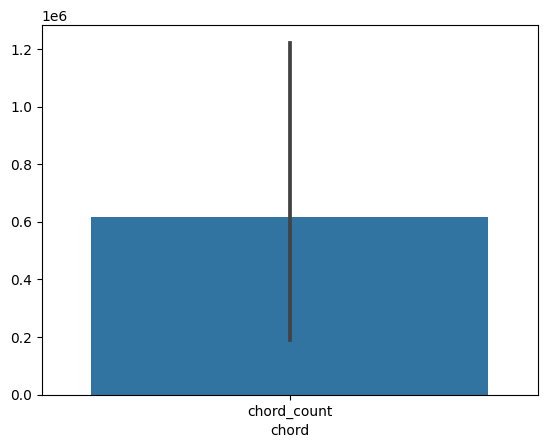

,chord_count
',11733888
",",5740984
,5740984
m,1508031
G,1073273


In [2]:
chord_count_df = count_chords('final_df_v4.csv', low_freq_to_remove=10, 
                              histplot=True, ascending=False)
chord_count_df.head(5)

In [ ]:
genre_count_df = count_genres(final_df, histplot=False)

In [ ]:
artists_df = count_artists(final_df, histplot=False)